<DIV ALIGN=CENTER>

# Decision Trees
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

In this IPython Notebook, we explore how to effectively use the
Decision Tree algorithm, speciically for classification problems. First, we repeat
the decision tree analysis done in the Introduction to Machine Learning Notebook
from Week 1, which first introduced this algorithm. Also, we explore how changes in
the default parameters might affect the performance of this algorithm.

First, we will setup this Notebook, and then introduce the Iris data,
before making classifications for this data by using the scikit learn's
[Decision Tree][dtsk] algorithm.

-----

[dtsk]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [1]:
# Set up Notebook
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

-----

## Iris Data

We will use the standard Iris classification data set to explore how to
use these basic classification algorithms, starting in this Notebooks
with decision trees, or DT. The four primary dimensions of the
data include Sepal Length, Sepal Width, Petal Length, and Petal Width,
which can be seen from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

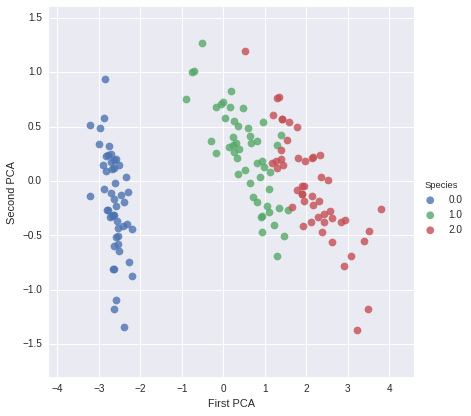

In [2]:
# We import helper code for getting and plotting the Iris data
import iris as hi

# Now we grab the raw data, and also create a sampled grid of data.

# This code restricts the features to the top two PCA components
# This simplifies the viewing of the predited labels.

data = hi.get_data()
mdata = hi.get_mdata(data)

# Get features (x) and labels (y)
x = data[:, 0:2]
y = data[:, 2]

# Show the data
cols = ['PCA1', 'PCA2', 'Species']

# We make a plot of the features.
hi.scplot_data('PCA1', 'PCA2', pd.DataFrame(data, columns = cols), 'Species',
               'First PCA', 'Second PCA', (-4.2, 4.6), (-1.8, 1.6), 6)

-----

## [Decision Trees][dt]

The third algorithm we will explore is the Decision Tree. A decision
tree simply asks a set of questions of the data, and based on the
answers determines the final classification. The tree is constructed by
recursively splitting a data set into new groupings based on a
statistical measure of the data along each different dimension (popular
measures include the Gini coefficient or the entropy). A basic decision
tree for the titanic survivor data set is demonstrated in the following
figure from Wikipedia (note that _sibsp_ counts the number of spouses or
siblings aboard).

![DT IMage from Wikipedia][dti]

The terminal nodes in the tree are known as leaf nodes, and the provide
the final predictions. In the simplest form, the leaf node simply
provides the final answer, as shown above the leaf nodes provide the
probability of survival.

We can use a decision tree classifier by using scikit-learn to once
again create a model, fit the model to the training data, and
subsequently applying the model to the test data to make predictions. We
compare the prediction accuracy in the resulting confusion matrix.

-----

[dt]: https://en.wikipedia.org/wiki/Decision_tree_learning
[dti]: https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png

DT prediction accuracy =  94.7%


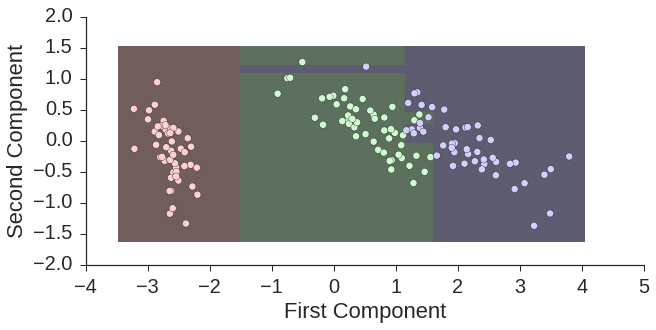

In [3]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# Next lets try Decision Trees
from sklearn import tree

# First we construct our Classification Model
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

z = dtc.predict(mdata)

hi.splot_data(data, mdata, z, 'First Component', 'Second Component', 50)

print("DT prediction accuracy = {0:5.1f}%".format(100.0 * dtc.score(x_test, y_test)))

In [4]:
from sklearn.metrics import classification_report

y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        12
 Versicolor       0.83      1.00      0.91        10
  Virginica       1.00      0.88      0.93        16

avg / total       0.96      0.95      0.95        38



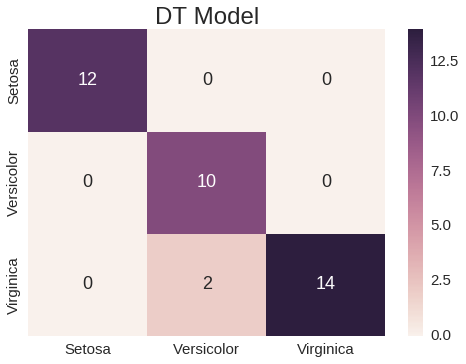

In [6]:
import mlplots as mlp

mlp.confusion(y_test, y_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, 'DT Model')

-----

## Student Activity

In the preceding cells, we used a simple decision tree model to predict
classifications for the Iris Data. Now that you have run the Notebook
once, go back and make the following changes to see how the results
change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the `criterion` from `gini`, the default, to `entropy`.
3. Change other default parameters, for example `class_weight` or
`max_features` and explore how the accuracy changes.
4. Apply a decision tree classifier to the original Iris features and
visualize the results.

What can you learn from the two-dimensional figure?

-----

## Visualizing the Tree

A decision tree is one of the easiest to understand algorithms, since a
decision tree essentially asks a list of questions to partition the
data. The scikit learn library includes an [`export_graphviz`][sket]
method that actually generates a visual tree representation of a
constructed decision tree classifier. This representation is in the [`dot`][dot]
 format recognized by the standard, open source [`graphviz`][gv] library. 

In the next few code cells, we export a dot format of the Iris decision
tree we just constructed, convert it to an SVG image, and subsequently
display this image inline in our notebook. We will discuss both
`graphviz` and the `dot` format more later in this course.

-----
[sket]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz
[dot]: http://www.graphviz.org/doc/info/lang.html
[gv]:http://www.graphviz.org

In [7]:
# Note the conda environment in the class curently only supports 
# scikit learn v16.1, this limits our ability to control the appearance
# of the tree

from sklearn.tree import export_graphviz

# Write the dot representation of the tree to a file
with open('tree.dot', 'w') as fdot:
    export_graphviz(dtc, fdot, feature_names=['First', 'Second'])

In [9]:
# We run the dot tool at the command line to create a viewable image.
!dot -Tsvg tree.dot -o tree.svg

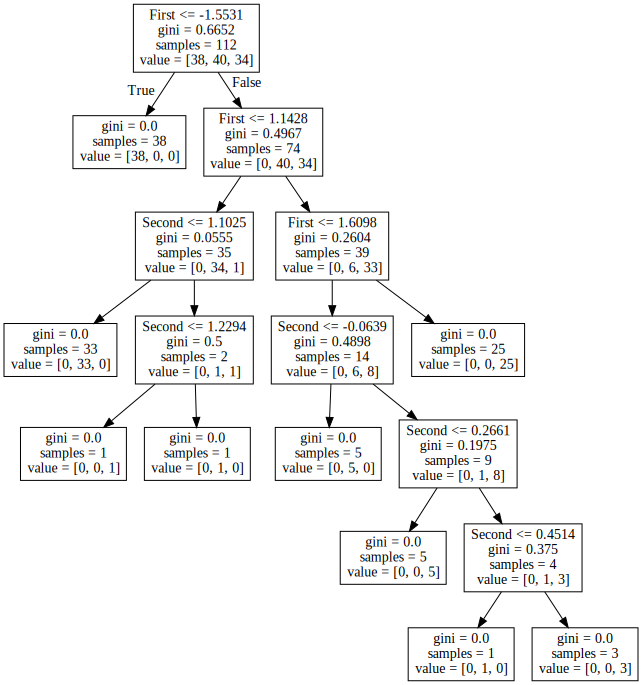

In [10]:
# Now display the image inline
from IPython.display import SVG
SVG(filename='tree.svg')

## Handwritten Digits

Now we switch to the handwritten digit data set to see how well decision
trees can classify these data. First we will load the data and review
some of the sample. After which, we will apply the Decision Tree
classification to these data and explore the resulting predictions.

-----

Total number of samples = 1797


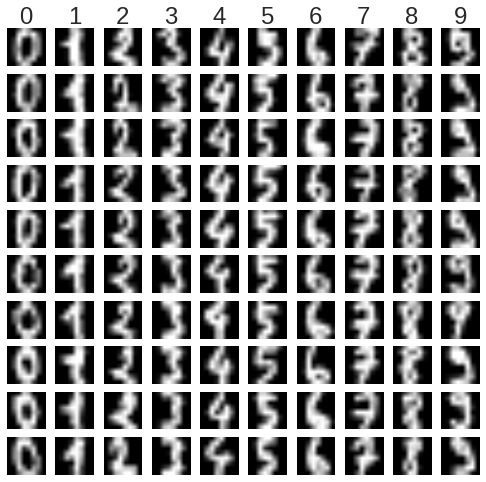

In [12]:
import digits as hd

x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

### Classification of image data

Now that these data are loaded, we can apply a DT classifier to this
problem. Below we employ a simple Decision Tree, and show the
classification score, the classification report, and the confusion
matrix.

----- 

In [13]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

print('Prediction Accuracy = {0:3.1f}%'.format(100*dtc.score(x_test, y_test)))

Prediction Accuracy = 86.0%


In [14]:
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.90      0.91        41
          1       0.90      0.93      0.91        40
          2       0.89      0.86      0.88        49
          3       0.92      0.88      0.90        52
          4       0.81      0.84      0.82        50
          5       0.82      0.92      0.87        36
          6       0.90      0.82      0.86        45
          7       0.87      0.85      0.86        46
          8       0.82      0.82      0.82        45
          9       0.76      0.80      0.78        46

avg / total       0.86      0.86      0.86       450



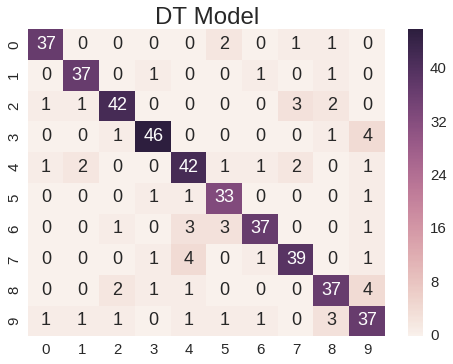

In [15]:
nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

mlp.confusion(y_test, y_pred, nms, 10, 'DT Model')

-----

### Model Evaluation

The DT model performed in a reasonable manner, but what about
on completely blind data. We can test the model by _making_ new data.
Below we use methods in the helper code to make _fake_ data, in this
case images of **one** and **seven**. We display the _fake_ images, and
then the results of our model classifying these new data.

-----

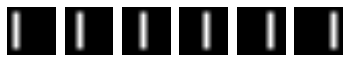

In [13]:
# Test on our sevens

ones = hd.make_ones()

hd.plot_numbers(ones)

In [14]:
# You can change the values to make other numbers.

ones[0].reshape(8,8)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [15]:
print('Actual : Predicted')

for one in ones:
    print('  1    :     {0}'.format(dtc.predict(one.ravel())[0])) 

Actual : Predicted
  1    :     4
  1    :     5
  1    :     6
  1    :     2
  1    :     2
  1    :     6


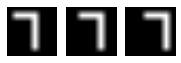

In [16]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [17]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(dtc.predict(seven.ravel())[0])) 

Actual : Predicted
  7    :     2
  7    :     2
  7    :     6


-----

## Student Activity

In the preceding cells, we used a simple DT model to predict
classifications for the digit data. Now that you have run the Notebook,
go back and make the following changes to see how the results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?

2. Change the default parameters in the DT algorithm, like the maximum
number of features or maximum depth. Read the code documentation to
learn about the default parameters.

3. Create a tree visualization for the handwritten digit data, note you
may want to limit the depth of the tree.

Finally can you explain (feel free to use the class forums) why the
model performed in the  manner it did for the _fake_ digits? How do the
DT results compare to other simple classifiers?

-----